Exercise 4.1 “A Soft Murmur” is a web site that plays a mixture of natural
noise sources, including rain, waves, wind, etc. At http://asoftmurmur.
com/about/ you can find their list of recordings, most of which are at http:
//freesound.org.
Download a few of these files and compute the spectrum of each signal.
Does the power spectrum look like white noise, pink noise, or Brownian
noise? How does the spectrum vary over time?

In [71]:
from __future__ import print_function, division

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import thinkdsp
import thinkplot
import thinkstats2 

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

두 wav 파일 읽기

In [72]:
wave1 = thinkdsp.read_wave('13793__soarer__north-sea.wav')
wave2 = thinkdsp.read_wave('105272__inchadney__strong-wind-in-the-forest.wav')

세그먼트로 쪼개기

In [73]:
seg1 = wave1.segment(start=0, duration=0.5)
seg2 = wave2.segment(start=0, duration=0.5)

Wave의 모양 - Noise

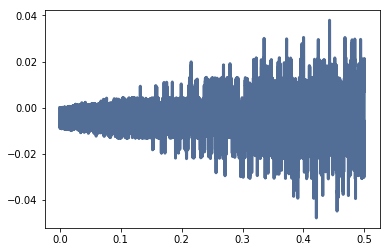

In [74]:
seg1.plot()

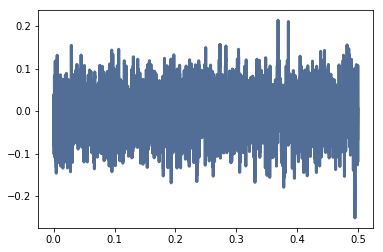

In [75]:
seg2.plot()

Linear Scale의 wave1 스펙트럼 그리기

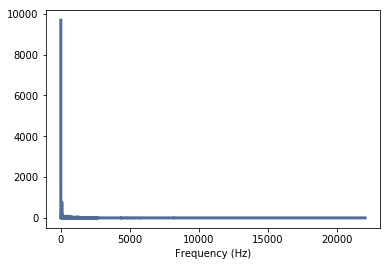

In [76]:
spec1 = seg1.make_spectrum()
spec1.plot_power()
thinkplot.config(xlabel='Frequency (Hz)')

wave1의 스펙트럼을 Log-log scale로 나타내기

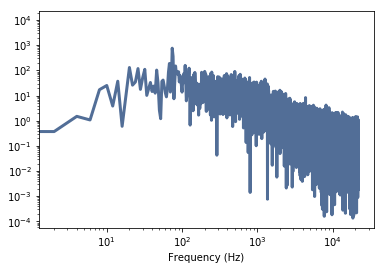

In [77]:
spec1.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',xscale='log',yscale='log')

Linear Scale의 wave2 스펙트럼 그리기

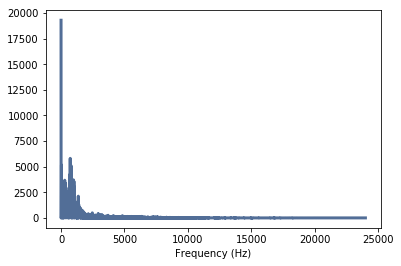

In [78]:
spec2 = seg2.make_spectrum()
spec2.plot_power()
thinkplot.config(xlabel='Frequency (Hz)')

wave2의 스펙트럼을 Log-log scale로 나타내기

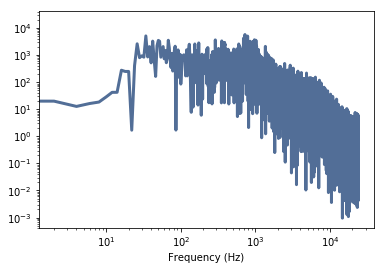

In [79]:
spec2.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',xscale='log',yscale='log')

LInear Scale의 두 스펙트럼 형태 비교

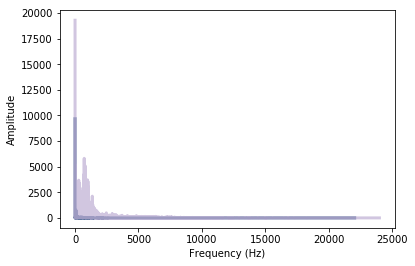

In [95]:
spec1.plot_power()
spec2.plot_power(color='#beaed4')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')

Log-log Scale의 두 스펙트럼 형태 비교

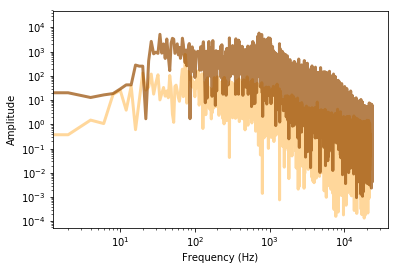

In [96]:
spec1.plot_power(color='#ffc671') # White에 가까운 Pink 노이즈
spec2.plot_power(color='#964b00') # Brownian에 가까운 Pink 노이즈
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude',
                 xscale='log', 
                 yscale='log')

두 log scale 스펙트럼의 slope 계산 

In [97]:
result1 = spec1.estimate_slope()
result1.slope

-1.1265673670475325

spec1의 파워 스펙트럼의 slope, Beta 값은 -1.1이다.
Power = 1/f^(-1.1) 이므로 White Noise에 가까운 Pink Noise이다.

In [98]:
result2 = spec2.estimate_slope()
result2.slope

-1.8160145956563436

spec2의 파워 스펙트럼의 slope, Beta 값은 -1.8이다.
Power = 1/f^(-1.8) 이므로 Brownian Noise(Red Noise)에 가까운 Pink Noise이다.